In [0]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.corpus import RegexpTokenizer
from nltk.corpus import brown

import gensim

from sklearn.decomposition import PCA

from matplotlib import pyplot

In [0]:
nltk.download()

In [4]:
forgooglecolab = True
if forgooglecolab:
  from google.colab import files
  uploaded = files.upload()

Saving got5.txt to got5.txt
Saving got4.txt to got4.txt
Saving got3.txt to got3.txt
Saving got2.txt to got2.txt
Saving got1.txt to got1.txt


In [0]:
files = []
filenames = ["got1.txt", "got2.txt", "got3.txt", "got4.txt", "got5.txt"]

In [0]:
sentences = []

for filename in filenames:
  file = open(filename)
  lines = file.readlines()

  for index, line in enumerate(lines):
    if "PROLOGUE" in line:
      lines = lines[index+1:]

  for index, line in enumerate(lines):
    if "APPENDIX" in line:
      lines = lines[:index]

  for line in lines:
    if len(line) > 1:
      for sentence in sent_tokenize(line):
        sentences.append(sentence)

In [0]:
stop_words = set(stopwords.words("english"))
tokenizer = RegexpTokenizer(r'\w+')
filtered_sentences = []

for sentence in sentences:
  sent = []

  for word in word_tokenize( " ".join(tokenizer.tokenize(str(sentence)))):
    if word not in list(stop_words):
      sent.append(word.lower())
  if len(sent) > 1:
    filtered_sentences.append(sent)

From here we start to get the embeddings.

In [0]:
model = gensim.models.Word2Vec(filtered_sentences, size=100, window=3, min_count=1, workers=4, sg=0, iter=10)

In [85]:
x = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(x)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [0]:
def plotlist(list):
  x = []
  for element in list:
    x.append(model[element])

  result = pca.fit_transform(x)
  pyplot.scatter(result[:, 0], result[:, 1])
  for i, word in enumerate(list):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
  pyplot.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.


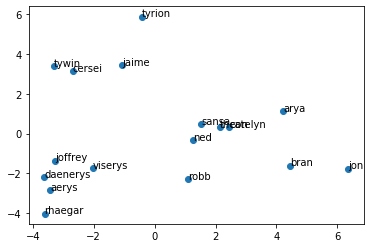

In [87]:
characters = [
              'jon',
              'sansa',
              'arya',
              'daenerys',
              'theon',
              'robb',
              'cersei',
              'ned',
              'rhaegar',
              'jaime',
              'tyrion',
              'tywin',
              'bran',
              'catelyn',
              'joffrey',
              'viserys',
              'aerys'
]

plotlist(characters)

[[-0.3969465   0.31253332  0.24356055 ...  0.10549022  0.23298007
   0.337822  ]
 [ 0.00598025  0.01277379  0.02274298 ... -0.01730077 -0.02913482
   0.02719668]
 [-0.05688496 -0.15322004  0.12039452 ... -0.12924755 -0.03869482
   0.06158046]
 ...
 [ 0.00537553  0.01766133  0.01066044 ... -0.01798916 -0.0236096
   0.04799468]
 [ 0.01602186  0.02370741  0.00573849 ... -0.02781528 -0.01934096
   0.07589811]
 [ 0.01088704  0.01282121  0.01201882 ... -0.03809012 -0.02451056
   0.03526589]]
